In [149]:
# LSTM - A-95
'''Точечное прогнозирование. В данном случае модель обучается прогнозированию одного значения в будущем 
на основе имеющейся истории по одной переменной (Price).'''

'Точечное прогнозирование. В данном случае модель обучается прогнозированию одного значения в будущем \nна основе имеющейся истории по одной переменной (Price).'

In [150]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [151]:
# Importing the dataset
df = pd.read_excel('cena1.xlsx', encoding='ISO-8859-1')

In [152]:
df

,Date,Price,Kurs_dollar,Kurs_euro,Oil_price,Used
0,2017-01-03,23.82,27.190858,28.422604,55.64,57.611681
1,2017-01-04,23.85,27.190858,28.422604,56.25,57.571419
2,2017-01-05,23.85,26.692366,27.858822,56.77,57.532696
3,2017-01-06,23.87,26.286719,27.603684,56.82,57.496014
4,2017-01-10,23.87,27.020929,28.612462,53.64,57.379405
...,...,...,...,...,...,...
877,2020-07-27,22.87,27.755900,32.224600,43.95,77.059356
878,2020-07-28,22.87,27.757100,32.604900,43.65,76.648569
879,2020-07-29,22.87,27.685100,32.453900,44.10,76.239853
880,2020-07-30,22.89,27.686700,32.469600,43.61,75.834026


In [153]:
df.describe()

,Price,Kurs_dollar,Kurs_euro,Oil_price,Used
count,882.000000,882.000000,882.000000,882.000000,882.000000
mean,27.532562,26.498737,30.160756,60.133821,64.758612
std,2.716192,1.141419,1.949076,12.320516,8.235289
min,21.820000,23.255155,25.766712,19.640000,45.035957
25%,25.072500,26.015569,28.953476,53.677500,60.394068
50%,28.500000,26.623103,30.210887,61.865000,64.395885
75%,29.207500,27.167187,31.533802,68.122500,69.702419
max,33.160000,28.875837,35.664229,86.100000,85.378682


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002595269B8B0>],
      dtype=object)

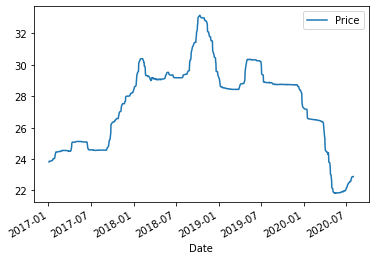

In [154]:
# Features 
uni_data = df.iloc[:, 1:2]
uni_data.index = df['Date']
uni_data.plot(subplots=True)

In [155]:
'''Функция возвращает временные интервалы для обучения модели. 
Аргумент history_size — размер временного интервала, на основе которого будет делаться прогноз, 
target_size – аргумент, определяющий насколько далеко в будущее модель должна научиться прогнозировать. 
Другими словами, target_size – это целевой вектор, который необходимо спрогнозировать.'''
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

array([[        nan],
       [ 0.00125945],
       [ 0.        ],
       [ 0.00083857],
       [ 0.        ],
       [ 0.00041894],
       [ 0.        ],
       [ 0.00041876],
       [ 0.00041859],
       [ 0.        ],
       [ 0.00041841],
       [ 0.00292765],
       [ 0.00083403],
       [ 0.00083333],
       [ 0.        ],
       [ 0.00041632],
       [ 0.00041615],
       [-0.00041597],
       [ 0.01040366],
       [ 0.00494234],
       [ 0.00081967],
       [ 0.0012285 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.000409  ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.00081766],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.00081699],
       [ 0.        ],
       [ 0.00040816],
       [ 0.        ],
       [ 0.        ],
       [ 0.00163199],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

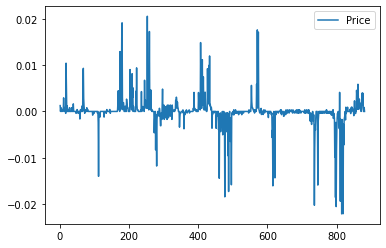

In [156]:
'''Подготовим данные для модели с одномерным входом (Переменной Price).'''
TRAIN_SPLIT = 705
# Feature Scaling
uni_data = df.iloc[:, 1:2].pct_change()
uni_data.plot()
uni_data
uni_data_array=uni_data.values
uni_data_array

In [157]:
'''На вход в модель будут подаваться последние 15 значений цены бензина, 
модель необходимо обучить прогнозировать цену на следующем шаге по времени.'''
# Creating lagged dataset
univariate_past_history = 15
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data_array[1:], 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data_array[1:], TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [158]:
'''Результаты применения функции univariate_data.'''
# Sliding window
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Gasoline price to predict')
print (y_train_uni[0])

Single window of past history
[[0.00125945]
 [0.        ]
 [0.00083857]
 [0.        ]
 [0.00041894]
 [0.        ]
 [0.00041876]
 [0.00041859]
 [0.        ]
 [0.00041841]
 [0.00292765]
 [0.00083403]
 [0.00083333]
 [0.        ]
 [0.00041632]]

 Gasoline price to predict
[0.00041615]


In [159]:
def create_time_steps(length):
  return list(range(-length, 0))

In [160]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\ztnik\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

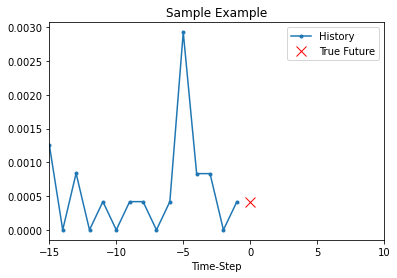

In [161]:
# One sliding window plotting
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [162]:
'''Прежде чем приступить к обучению модели, рассчитаем базовое решение (baseline). 
Оно заключается в следующем: для заданного входного вектора метод базового решения 
«просматривает» всю историю и прогнозирует следующее значение как среднее из последних 15 наблюдений.'''
# Baseline model
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from 'C:\\Users\\ztnik\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

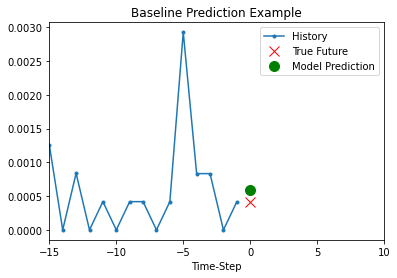

In [163]:
# Baseline Prediction plotting
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [164]:
# Importing the Tensorflow libraries and packages
import tensorflow as tf
#from tf.data import Dataset

# Importing the Keras libraries and packages
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [165]:
'''C помощью tf.data выполним перемешивание (shuffle), пакетирование (batch) и кэширование (cache) набора данных.'''
# Data preprocessing
BATCH_SIZE = 35
BUFFER_SIZE = 50

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [166]:
# LSTM creating
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(4, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [167]:
'''Проверим выход модели'''
simple_lstm_model.predict(val_univariate.take(1)).shape

(35, 1)

In [168]:
'''В общем плане РНС работают с последовательностями (sequences). 
Это означает, что подаваемые на вход модели данные должны иметь следующую форму:
[наблюдения, временной интервал, кол-во признаков]
Форма обучающих данных для модели с одномерным входом имеет следующий вид:'''
print(x_train_uni.shape)

(690, 15, 1)


In [172]:
# Fitting
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 7/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 8/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 10/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0018

<module 'matplotlib.pyplot' from 'C:\\Users\\ztnik\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

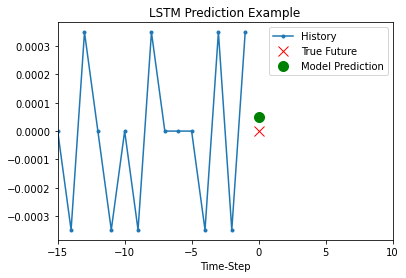

In [173]:
# LSTM Prediction plotting
show_plot([x_val_uni[0], y_val_uni[0], simple_lstm_model.predict(val_univariate.take(1))[0]], 0,
           'LSTM Prediction Example')

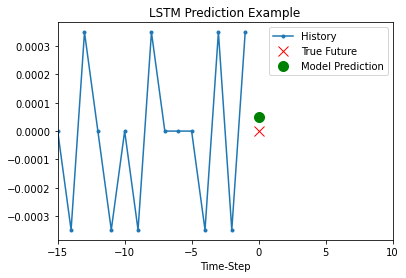

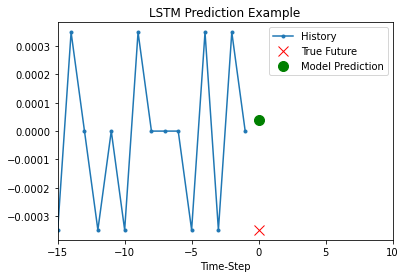

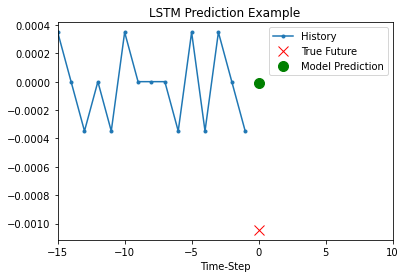

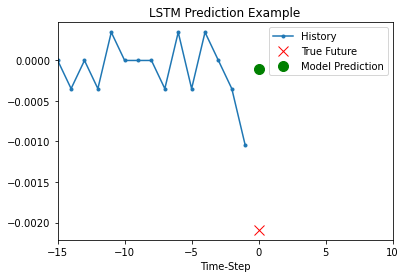

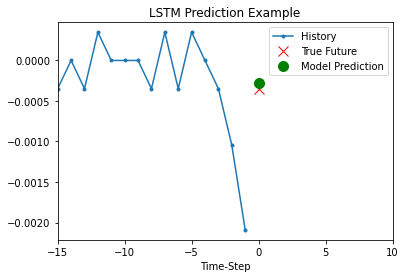

In [175]:
# LSTM Prediction plotting
for i in range(0,5):
    plot = show_plot([x_val_uni[i], y_val_uni[i], simple_lstm_model.predict(val_univariate.take(1))[i]], 0,
           'LSTM Prediction Example')
    plot.show()